# Usage of Ford GoBike System
## by Dominik Marquardt

## Investigation Overview

> This presentation focuses on the most common customer behaviors and characteristics. Specifically how user type impacts usage of the system and whether and if yes what are the differences. 

## Dataset Overview

> Ford GoBike is a bicycle sharing system in the San Francisco Bay Area

* has over 2,600 bicycles in
* 262 stations across San Francisco, East Bay and San Jose
* 2017 the sharing service has partnered with Ford Motor Company


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from jupyterthemes import jtplot
# chesterish', 'onedork', 'monokai', 'solarizedl', 'solarizedd'.
jtplot.style(theme='solarizedd')
import datetime
# set the color palette to one color - blue 
no_color = sb.color_palette()[0]

In [3]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv('data/201906_clean_baywheels_tripdata.csv')
df_cleaned.head()

C:\Users\domin\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_time_weekday,start_time_hour,end_time_hour,start_time_month,start_time_month_num,duration_min
0,81695,2019-06-30 18:16:09.773,2019-07-01 16:57:45.592,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,...,1502,Subscriber,No,NaN,Sun,18,16,June,6,1361
1,74260,2019-06-30 18:09:55.830,2019-07-01 14:47:36.681,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,...,2526,Customer,No,NaN,Sun,18,14,June,6,1237
2,59603,2019-06-30 15:40:31.038,2019-07-01 08:13:54.349,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,2427,Subscriber,No,NaN,Sun,15,8,June,6,993
3,67932,2019-06-30 12:49:47.781,2019-07-01 07:42:00.543,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,...,1261,Customer,No,NaN,Sun,12,7,June,6,1132
4,48894,2019-06-30 17:21:00.055,2019-07-01 06:55:54.996,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,1070,Customer,No,NaN,Sun,17,6,June,6,814


## User type usage -- Rides over Weekdays

> We can see a couple of things here:
* Higher proportion of subscribers in compare to customers
* Almost inverse behavior for the two user types -- subscriber v.s. customer

Customers show a quite low usage of the bike share system during weekdays and a lot more on weekends. Subscribers are the opposite - they show high usage on weekdays and a sharp decline on the weekends for the month of June 2019.

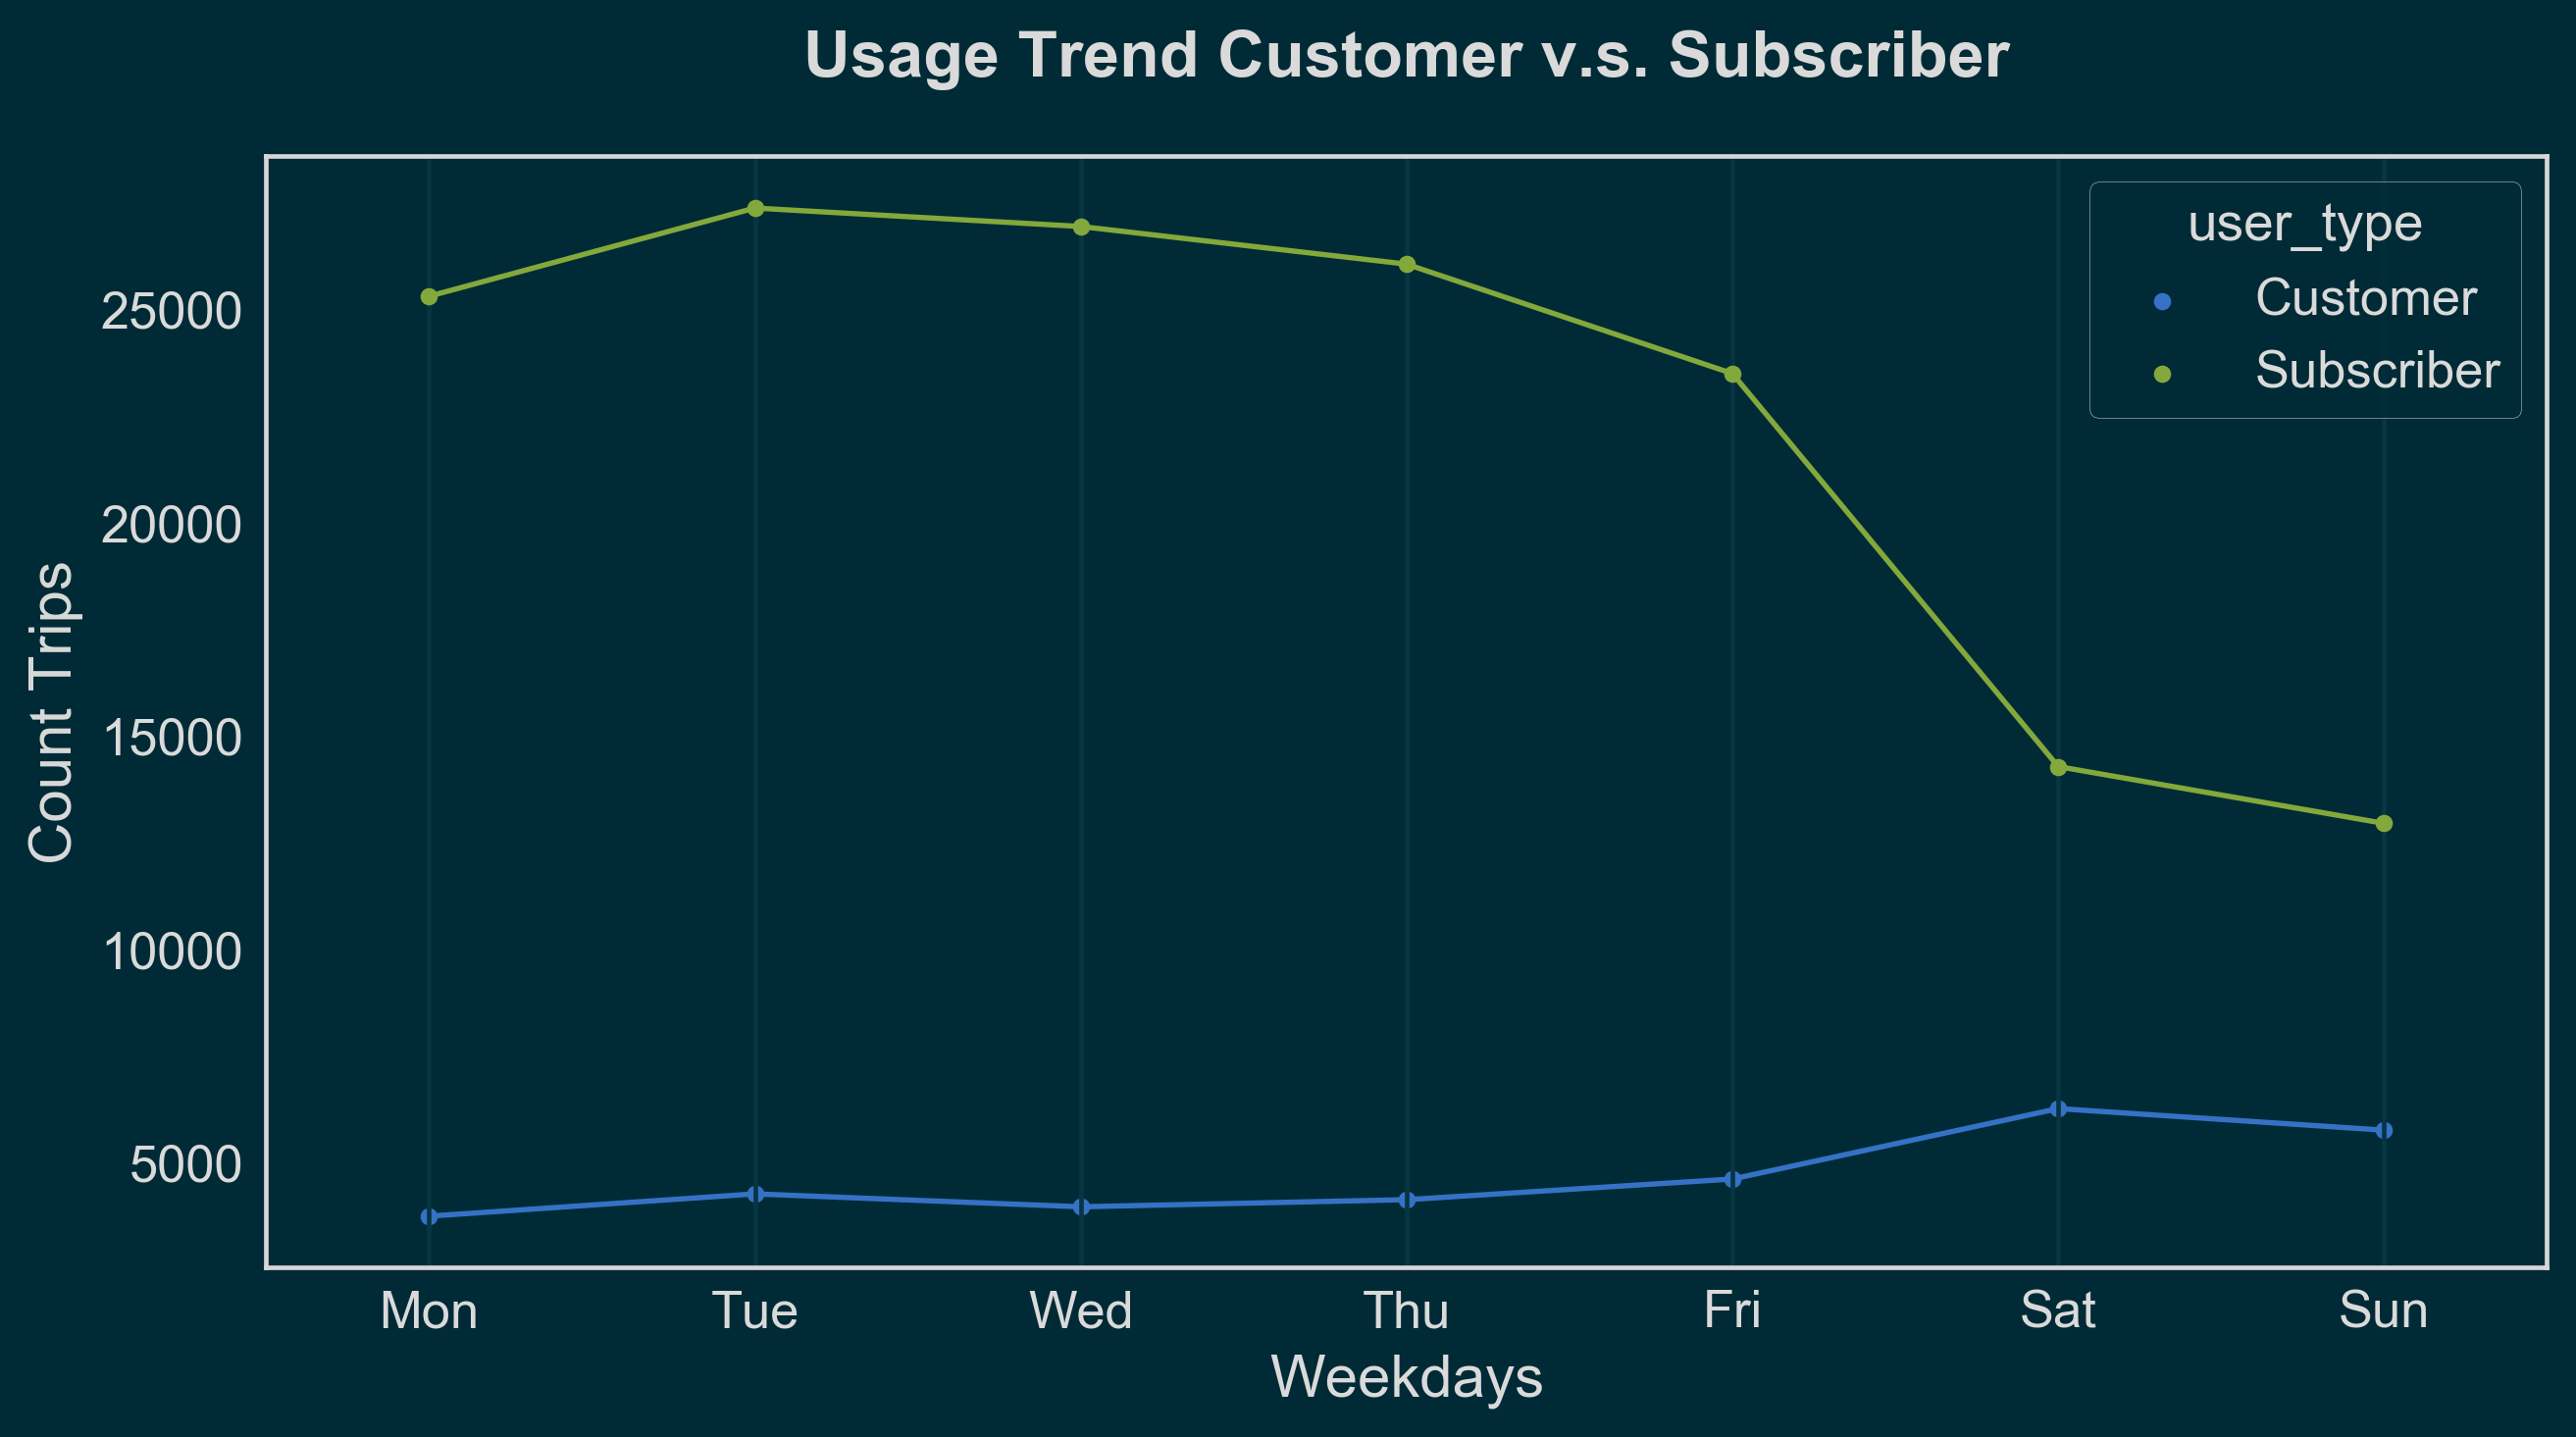

In [4]:
# prepare plot data for the customer amount and subscriber amount 
#Overall amount of customer
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
#Overall amount of subscriber
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
# Proportion of customer
customer_prop = customer / df_cleaned['bike_id'].count()
# Proportion of subscriber
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

# Customer Usage by Weekday vs. Subscriber Usage by Weekday
# Create fig size 
plt.figure(figsize=(10, 5),dpi=300)
# Prepare the data to plot
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned_usage_weekdays = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
# Actual call for plot the data 
ax = sb.pointplot(data=df_cleaned_usage_weekdays, x='start_time_weekday', y=0, hue = 'user_type', scale=.6, order = weekdays);
# Polish the plot
plt.title('Usage Trend Customer v.s. Subscriber', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Count Trips');
plt.grid()

## User type usage -- Rides over Duration

 Beside the obvious face, that there are more subscriber than customer, we can see here easily three things
 * durations for customers with ~5-20 min
 * subscribers ~4 to 13 min
 * almost all customers drive longer then - Fat Tail Curve

<Figure size 4500x4500 with 0 Axes>

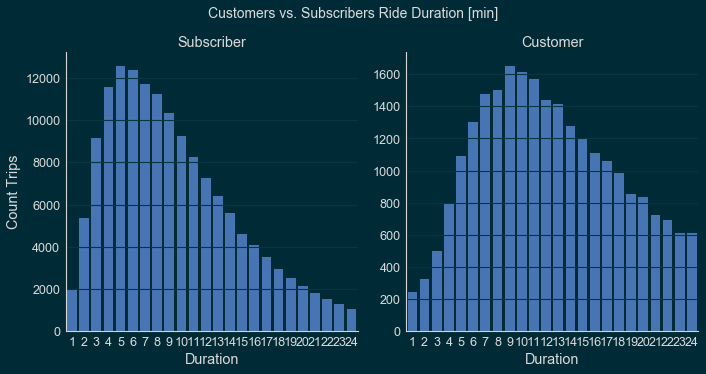

In [5]:
# # Customer Usage by Duration vs. Subscriber Usage by Duration
# Filter data for outliers
plt.figure(figsize = (15, 15), dpi=300);

df_cleaned_filtered_25_min_duration = df_cleaned.query('duration_min < 25')
# Actual plot of the histogram
ax = sb.catplot(data=df_cleaned_filtered_25_min_duration, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color);

ax.fig.suptitle('Customers vs. Subscribers Ride Duration [min]', y=1.04, fontsize=14, fontweight='normal');
ax.set_axis_labels('Duration', 'Count Trips');
ax.set_titles('{col_name}');
ax.set_xticklabels(rotation=0);
ax.fig.tight_layout();

The violine plt shows this Fat Tail effect quite well!
Customers distrubtion shows a so called "Fat Tail" curve. This tells us that not only the mean uses the bikes longer but almost all customers use the bikes relatively longer then each of the subcriber.

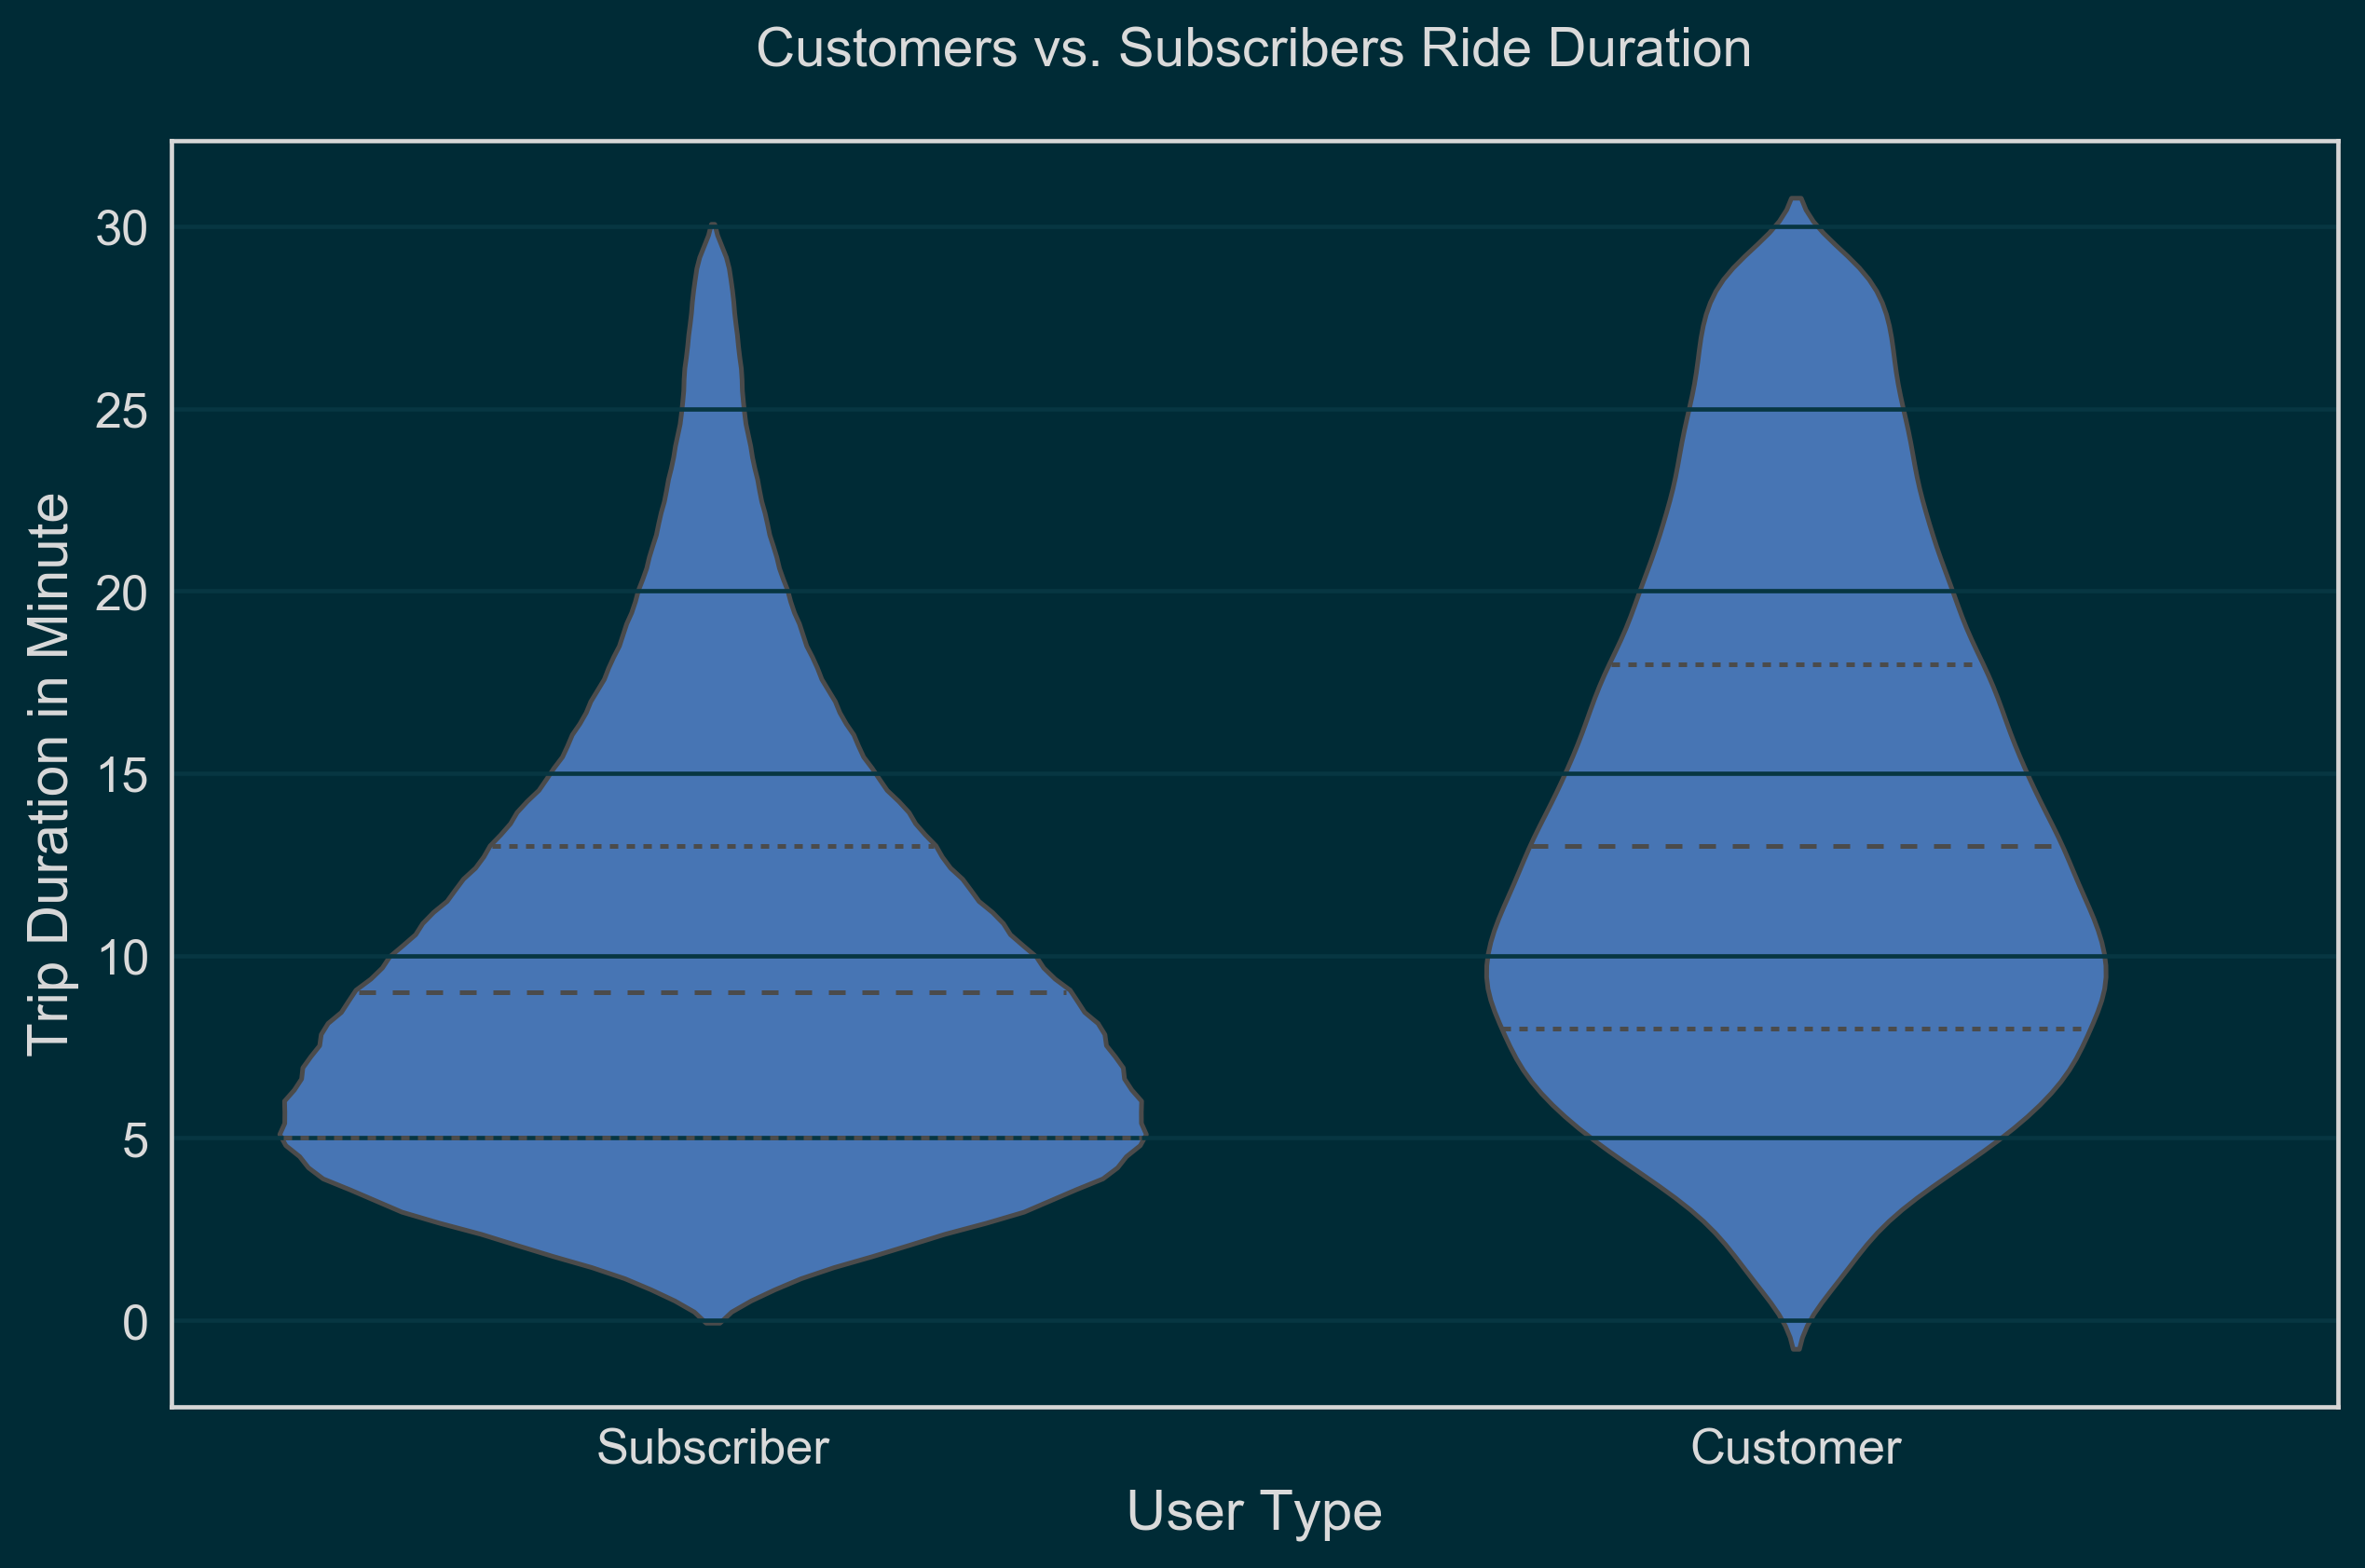

In [13]:
#define title 
plt.figure(figsize = [10,6],dpi=300)
# Actul plot call for plotting the violine plot
sb.violinplot(data=df_cleaned_filtered_30_min_duration, x='user_type', y='duration_min', color=no_color, inner='quartile');
# Polish the plot for better readablility 
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Customers vs. Subscribers Ride Duration', y=1.04, fontsize=14, fontweight='normal');

## User type usage -- Rides v.s. Weekdays v.s. Hours 

This heat map makes the differece between the two types very intuitive achieves something amazing.

It shows everything at a glance.

It is impressive how clear and stright the subscriber show up with
* white strikes at 7-8am and 5-6pm.That's the commute time
* drop in usage at saturday and sundays across all 24 hour 

The customers shows up like:
* higher usage between 7-8am and 5-6pm for weekdays
* clearly see the high increase of usage between 10am-4pm on weekends. Thats pleasure time. 

Overall this plot is the best plot for getting a fast and clear insight on this two groups because it shows all main features at a glance

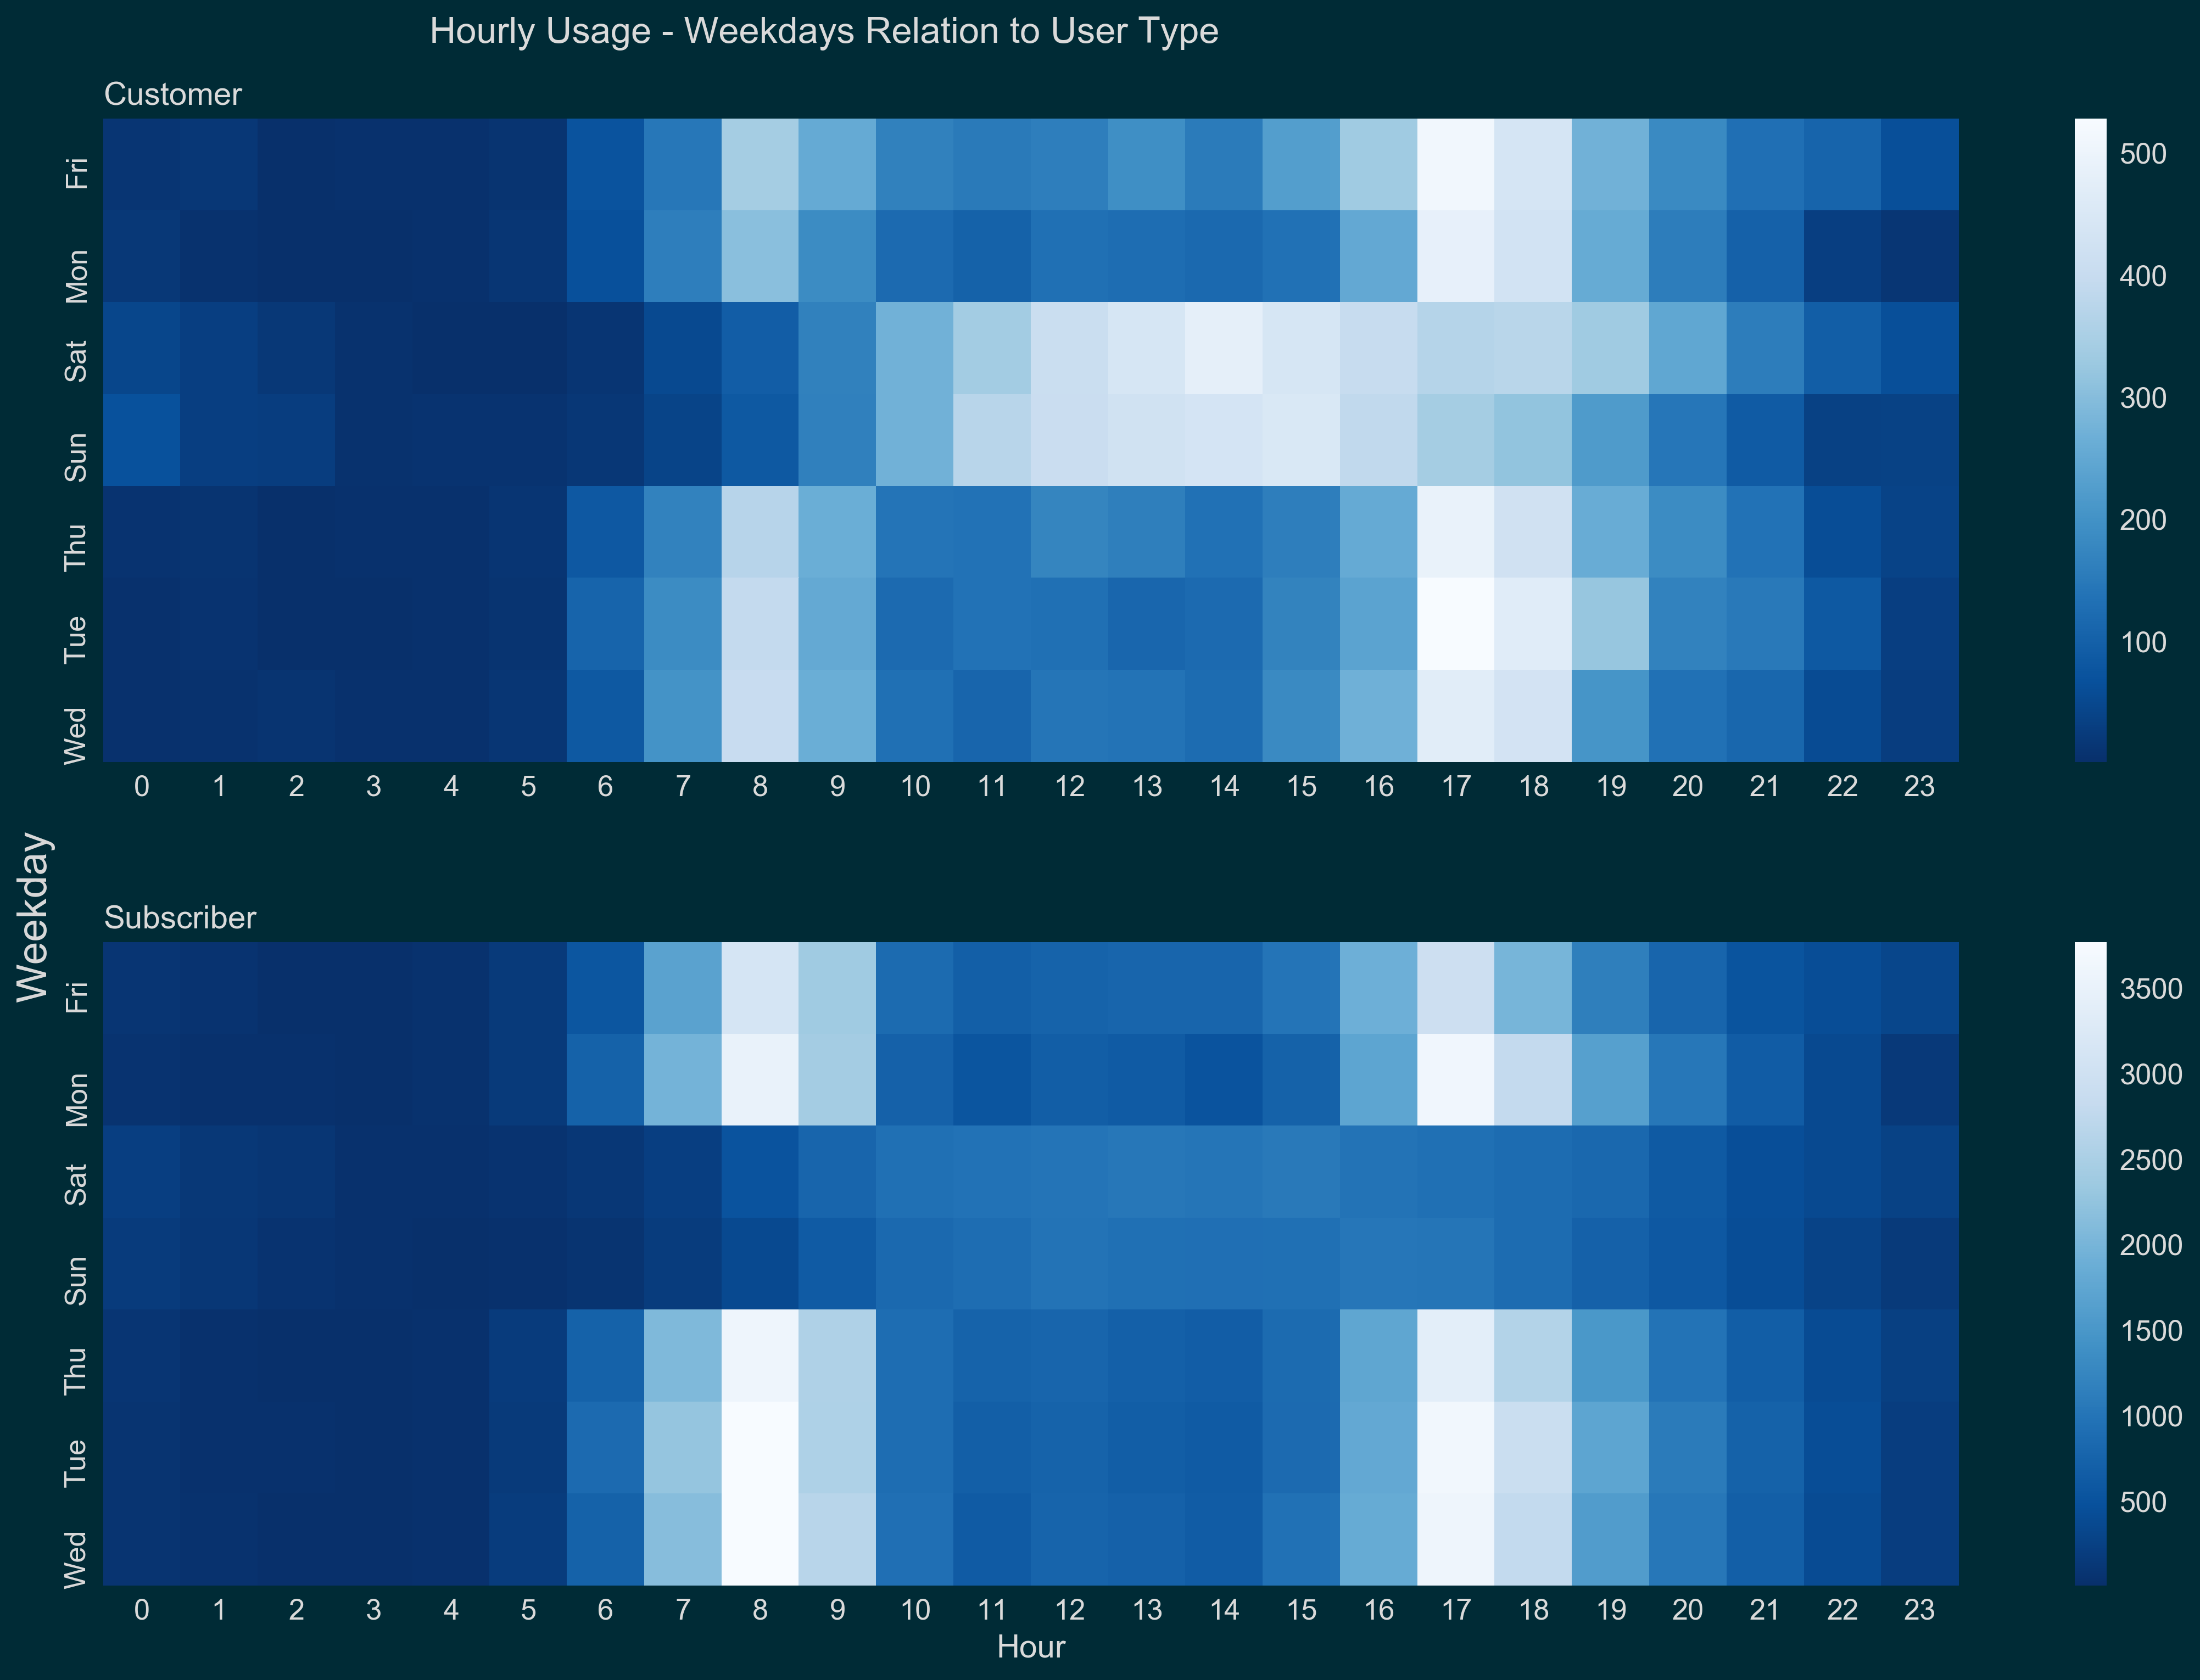

In [48]:
# Create General Figure size for better visualization 
fig, ax = plt.subplots(2, 1, figsize = (15, 10), dpi=300)
fig.suptitle('Hourly Usage - Weekdays Relation to User Type',y=1.02, horizontalalignment='right',fontsize=16)

# Create first subplot for the customer relation to hour and weekday 
plt.subplot(2, 1, 1)

#create customer data only 
customer_data = df_cleaned_filtered_30_min_duration.query('user_type == "Customer"')
customer_counts = customer_data.groupby(['start_time_weekday', 'start_time_hour']).size()
customer_counts = customer_counts.reset_index(name='count')
customer_counts = customer_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
# Call for the heat map plot for cutomer 
sb.heatmap(customer_counts, cmap='Blues_r');
# polish the plot for better readability
plt.title('Customer', loc='left',fontsize = 14);
# Remove labels
plt.ylabel('')    
plt.xlabel('')

# Doin principle the same for the Subscriber as we have done above 
plt.subplot(2, 1, 2)
# Prepare subscriber data 
subscribers_data = df_cleaned_filtered_30_min_duration.query('user_type == "Subscriber"')
subscribers_counts = subscribers_data.groupby(['start_time_weekday', 'start_time_hour']).size()
subscribers_counts = subscribers_counts.reset_index(name='count')
subscribers_counts = subscribers_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
# Call heatmap plot
sb.heatmap(subscribers_counts, cmap='Blues_r');
#Polish
plt.title('Subscriber', loc='left',fontsize = 14);
plt.xlabel('Hour',y=1.04, fontsize=14, fontweight='normal');
plt.ylabel('Weekday', y=1.04, fontsize=18, fontweight='normal');
# Auto allign
fig.tight_layout()

Conclusion of the last plot could be:

* Customer == H shape usage behavior
* Subscriber == double i shape usage behavior

Knowing this the Ford Motor Company can design new offers to their furture user type to better fit their actual need and make the business more profitable!